In [1]:
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import *

/nfs/software/stegle/users/acuomo/conda-envs/myscanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
fig_format = 'png'
sc.set_figure_params(dpi_save=200,format=fig_format)
rcParams['figure.figsize'] = 5,4

plotting_fcn = sc.pl.umap

In [3]:
from matplotlib import cm, colors

vega_20 = list(map(colors.to_hex, cm.tab20.colors))

color_dict = dict()

celltype_list = ['P_FPP','FPP','NB','DA','Sert','Astro','Epen1','Epen2','P_Sert','U_Neur1','U_Neur2','U_Neur3']
palette = [vega_20[idx] for idx in range(len(celltype_list))]

In [4]:
myorder = [0,1,2,4,5,8,7,9,10,3,6,11]
mypalette = [palette[i] for i in myorder]

In [5]:
### Day11

In [6]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"

In [7]:
file = mydir+"pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.h5"
adatafull = sc.read(file)

Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [8]:
# subsample
fraction = 1
adata = sc.pp.subsample(adatafull, fraction, copy=True)

In [9]:
adata.n_obs

253381

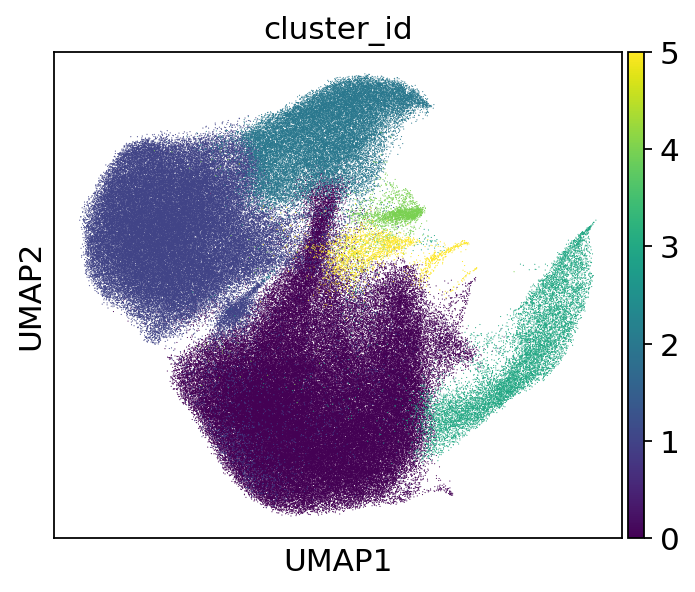

In [10]:
plotting_fcn(adata, color='cluster_id', size=1)

In [11]:
ordering = ['P_FPP','FPP','NB','DA','Sert','Astro','Epen1','Epen2','P_Sert','U_Neur1','U_Neur2','U_Neur3']
cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)
adata.obs['celltype'] = adata.obs['celltype'].astype(cat_type)

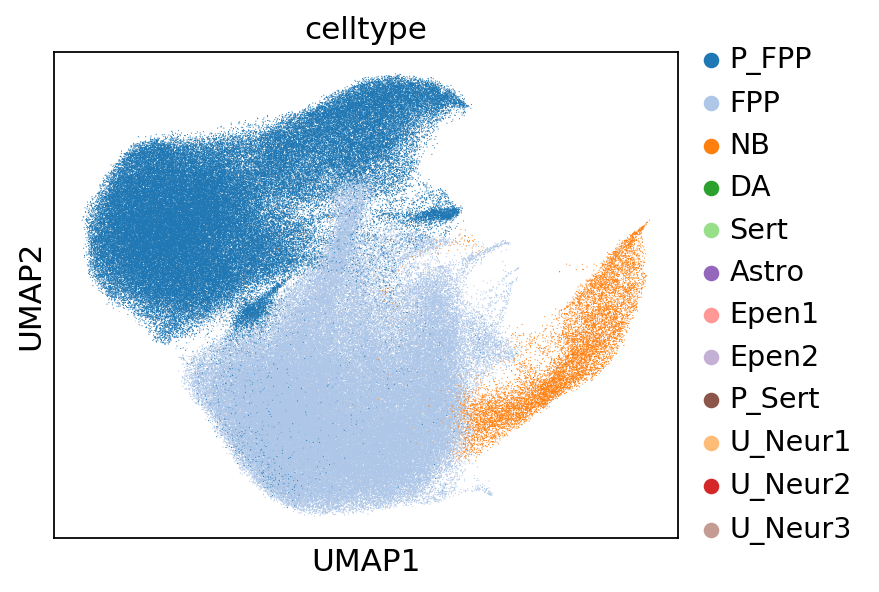

In [12]:
plotting_fcn(adata, color='celltype', palette=mypalette, size=1)

In [13]:
adata.obs['cluster_id_new'] = (
    adata.obs['cluster_id']
    .astype('category')
)

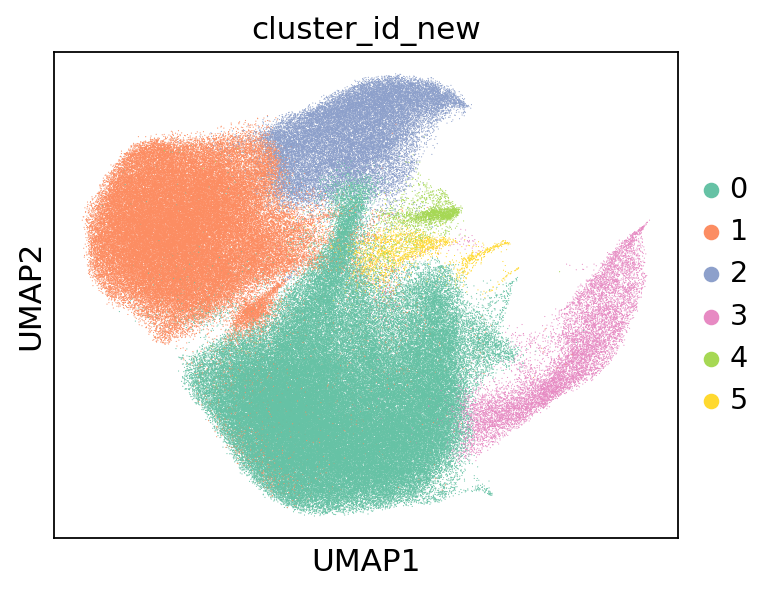

In [14]:
import seaborn as sns
plotting_fcn(adata, color='cluster_id_new', size=1, palette = sns.color_palette("Set2"))

In [15]:
### Day30

In [16]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"

In [17]:
file = mydir+"pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.h5"
adatafull = sc.read(file)

Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [18]:
# subsample
fraction = 1
adata = sc.pp.subsample(adatafull, fraction, copy=True)

In [19]:
adata.n_obs

250923

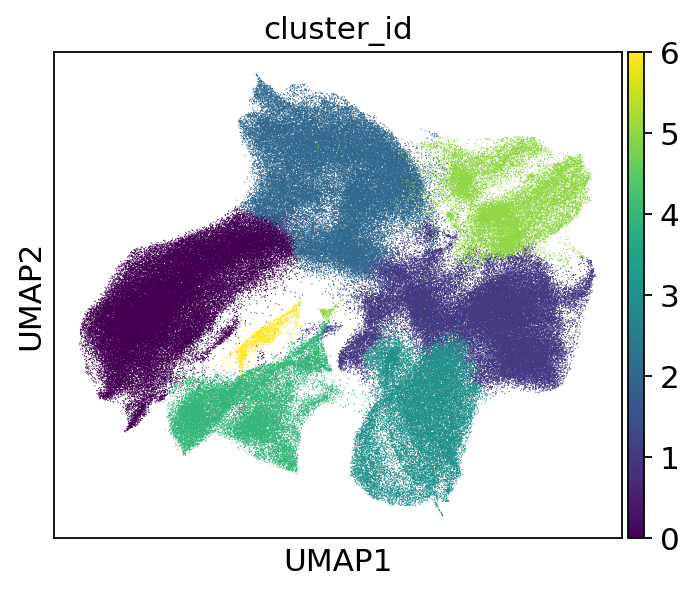

In [20]:
plotting_fcn(adata, color='cluster_id', size=1)

In [21]:
old_to_new = dict(
    DA = 'DA',
    Sert = 'Sert',
    Epen1 = 'Epen1', 
    Astro = 'FPP', 
    CHem = 'U_Neur1', 
    P_FPP = 'P_FPP',
    unknown = 'U_Neur2'
)
adata.obs['celltype_new'] = (
    adata.obs['celltype']
    .map(old_to_new)
    .astype('category')
)

In [22]:
ordering = ['P_FPP','FPP','NB','DA','Sert','Astro','Epen1','Epen2','P_Sert','U_Neur1','U_Neur2','U_Neur3']
cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)
adata.obs['celltype_new'] = adata.obs['celltype_new'].astype(cat_type)

In [23]:
myorder = [0,1,2,4,5,8,7,9,10,3,6,11]
mypalette = [palette[i] for i in myorder]

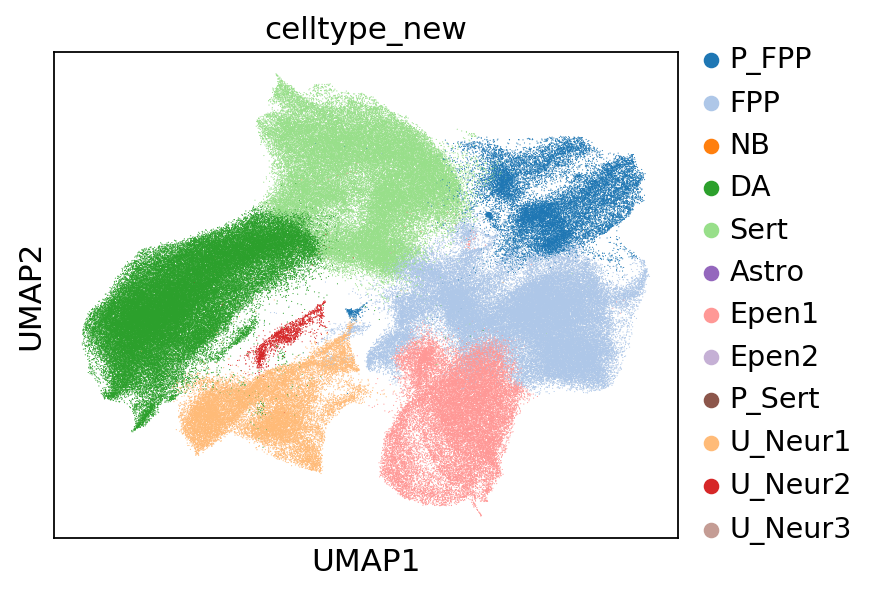

In [24]:
plotting_fcn(adata, color='celltype_new', palette = mypalette, size=1)

In [25]:
adata.obs['cluster_id_new'] = (
    adata.obs['cluster_id']
    .astype('category')
)

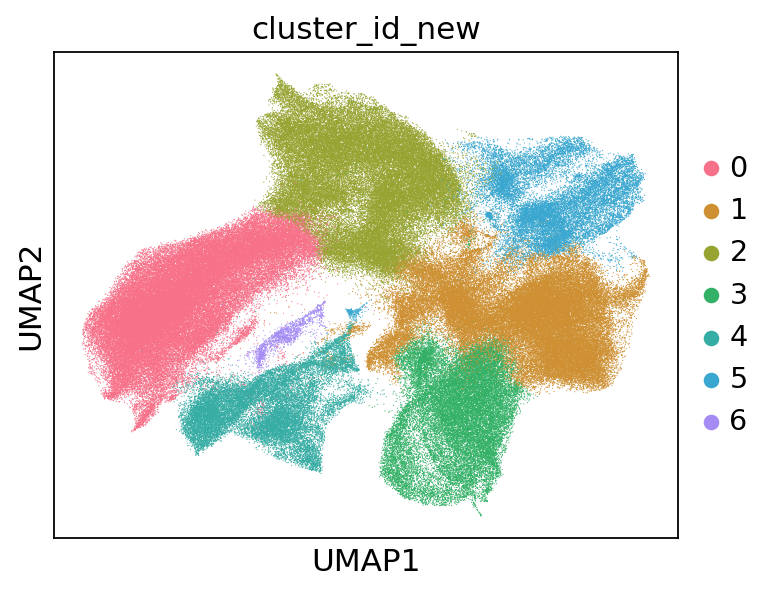

In [26]:
plotting_fcn(adata, color='cluster_id_new', palette = sns.color_palette("husl", 8), size=1)

In [27]:
### Day52

In [28]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"

In [29]:
file = mydir+"pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.h5"
adatafull = sc.read(file)

Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [30]:
adatafull.obs.head()

batch          donor_id  log1p_n_genes_by_counts  \
index                                                                   
AAACCTGAGAAAGTGG-1-0     0  HPSI0114i-eipl_1                 7.883446   
AAACCTGAGATCTGCT-1-0     0  HPSI0114i-eipl_1                 8.137103   
AAACCTGAGCTAGTGG-1-0     0  HPSI0115i-paim_1                 7.958926   
AAACCTGAGGAGCGTT-1-0     0  HPSI0614i-liqa_1                 8.401782   
AAACCTGAGGTGCTTT-1-0     0  HPSI0114i-eipl_1                 8.187577   

                      log1p_total_counts  log1p_total_counts_mito  \
index                                                               
AAACCTGAGAAAGTGG-1-0            8.833463                 4.174387   
AAACCTGAGATCTGCT-1-0            9.267760                 5.549076   
AAACCTGAGCTAGTGG-1-0            8.898092                 4.997212   
AAACCTGAGGAGCGTT-1-0            9.901736                 6.864848   
AAACCTGAGGTGCTTT-1-0            9.341281                 5.068904   

                      n_genes_by_counts  pct_counts_in_top_100_genes  \
index                                                                  
AAACCTGAGAAAGTGG-1-0               2652                    35.850707   
AAACCTGAGATCTGCT-1-0               3418                    35.231350   
AAACCTGAGCTAGTGG-1-0               2860                    33.210332   
AAACCTGAGGAGCGTT-1-0               4454                    46.538770   
AAACCTGAGGTGCTTT-1-0               3595                    35.392174   

                      pct_counts_in_top_200_genes  \
index                                               
AAACCTGAGAAAGTGG-1-0                    45.720951   
AAACCTGAGATCTGCT-1-0                    45.845137   
AAACCTGAGCTAGTGG-1-0                    43.720104   
AAACCTGAGGAGCGTT-1-0                    55.514927   
AAACCTGAGGTGCTTT-1-0                    45.481663   

                      pct_counts_in_top_500_genes  pct_counts_in_top_50_genes  \
index                                                                           
AAACCTGAGAAAGTGG-1-0                    61.408369                   27.117656   
AAACCTGAGATCTGCT-1-0                    60.661001                   26.043437   
AAACCTGAGCTAGTGG-1-0                    59.313926                   24.955583   
AAACCTGAGGAGCGTT-1-0                    66.995592                   38.614506   
AAACCTGAGGTGCTTT-1-0                    60.335147                   26.004562   

                      pct_counts_mito        sample_id  total_counts  \
index                                                                  
AAACCTGAGAAAGTGG-1-0         0.933081  5245STDY7426804        6859.0   
AAACCTGAGATCTGCT-1-0         2.417375  5245STDY7426804       10590.0   
AAACCTGAGCTAGTGG-1-0         2.009020  5245STDY7426804        7317.0   
AAACCTGAGGAGCGTT-1-0         4.793629  5245STDY7426804       19964.0   
AAACCTGAGGTGCTTT-1-0         1.386208  5245STDY7426804       11398.0   

                      total_counts_mito  cluster_id time_point pool_id  \
index                                                                    
AAACCTGAGAAAGTGG-1-0               64.0           2        D52   pool1   
AAACCTGAGATCTGCT-1-0              256.0           1        D52   pool1   
AAACCTGAGCTAGTGG-1-0              147.0           3        D52   pool1   
AAACCTGAGGAGCGTT-1-0              957.0           7        D52   pool1   
AAACCTGAGGTGCTTT-1-0              158.0           2        D52   pool1   

                     treatment  n_counts_all celltype  
index                                                  
AAACCTGAGAAAGTGG-1-0      NONE        6859.0    Astro  
AAACCTGAGATCTGCT-1-0      NONE       10590.0    Epen1  
AAACCTGAGCTAGTGG-1-0      NONE        7317.0       DA  
AAACCTGAGGAGCGTT-1-0      NONE       19964.0     Sert  
AAACCTGAGGTGCTTT-1-0      NONE       11398.0    Astro

In [31]:
# subsample
fraction = 1
adata = sc.pp.subsample(adatafull, fraction, copy=True)

In [32]:
adata.n_obs

523094

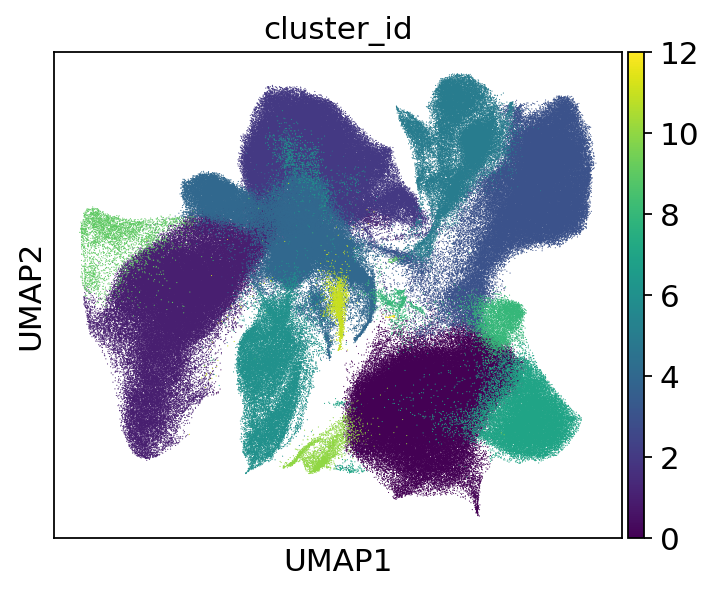

In [33]:
plotting_fcn(adata, color=str('cluster_id'), size=1)

In [34]:
old_to_new = dict(
    DA = 'DA',
    Sert = 'Sert',
    FPP = 'FPP',
    Epen1 = 'Epen1', 
    Astro = 'Astro', 
    CHem = 'U_Neur1', 
    P_FPP = 'P_FPP',
    Epen2 = 'Epen2', 
    unknown = 'U_Neur3',
    P_Sert = 'P_Sert'
)
adata.obs['celltype_new'] = (
    adata.obs['celltype']
    .map(old_to_new)
    .astype('category')
)

In [35]:
ordering = ['P_FPP','FPP','NB','DA','Sert','Astro','Epen1','Epen2','P_Sert','U_Neur1','U_Neur2','U_Neur3']

cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_new'] = adata.obs['celltype_new'].astype(cat_type)

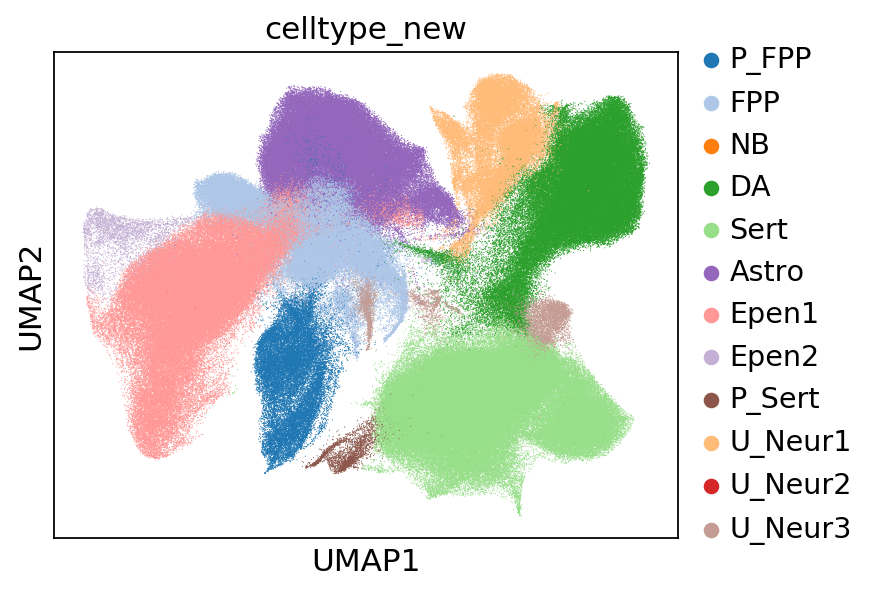

In [36]:
myorder = [0,1,2,4,5,8,7,9,10,3,6,11]
mypalette = [palette[i] for i in myorder]
plotting_fcn(adata, color='celltype_new', palette=mypalette, size=1)

In [37]:
adata.obs['cluster_id_new'] = (
    adata.obs['cluster_id']
    .astype('category')
)

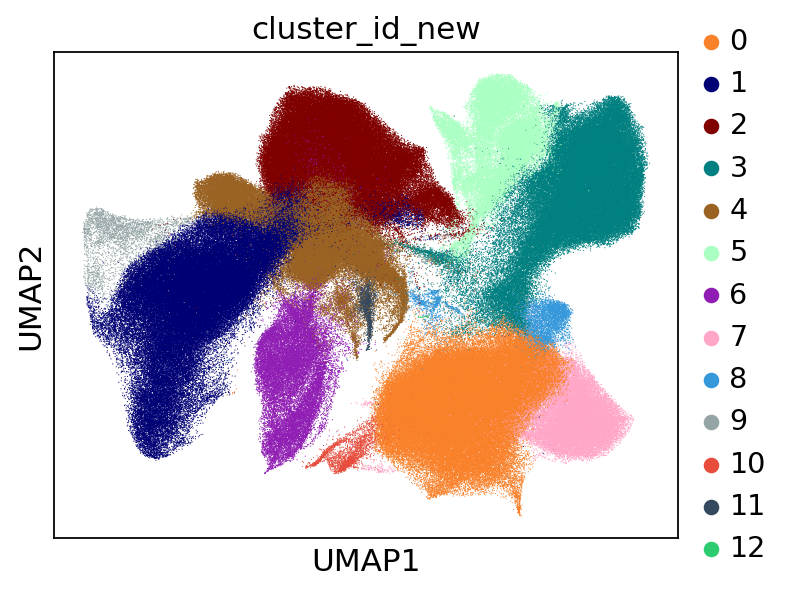

In [38]:
flatui = ["#f9812a","#000075","#800000","#008080","#9a6324","#aaffc3","#911eb4",
    "#ffa6c9", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
plotting_fcn(adata, color='cluster_id_new', size=1, palette = sns.color_palette(flatui))